# An automatically-updating DataWrapper graph using Python and Yahoo finance wrapper

## If necessary, we install the necessary libraries

In [1]:
#pip install datawrapper
#pip install yfinance
#pip install yahoofinancials

## We import them


In [2]:
from datawrapper import Datawrapper
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

## Now we pass our Datawrapper API key to the Datawrapper instance

In [3]:
dw = Datawrapper(access_token = "IVOkJfFZxTzEi6YyIJTGZDcqw0f4zKT2KT4W36jSPcDqOWcvqTfqrVw28yrQpMO8")
dw.account_info()

{'id': 442546,
 'email': '',
 'name': 'Jacopo Cirica',
 'role': 'editor',
 'language': 'en-US',
 'teams': [],
 'chartCount': 16,
 'url': '/v3/users/442546'}

## Import the dataset we are interested in. In this case, the stokes of gas natural have been chosen

In [4]:
gas_df = yf.download('NG=F', 
                      start='2021-12-06', 
                      end='2022-04-20', 
                      progress=False,
)
gas_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-06,3.826,3.886,3.630,3.657,3.657,176715
2021-12-07,3.680,3.829,3.657,3.708,3.708,162973
2021-12-08,3.734,3.931,3.723,3.815,3.815,146872
2021-12-09,3.818,3.924,3.725,3.814,3.814,141107
2021-12-10,3.798,3.965,3.760,3.925,3.925,133283


In [5]:
gas_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-12,6.705,6.947,6.600,6.680,6.680,234248
2022-04-13,6.704,7.091,6.652,6.997,6.997,210551
2022-04-14,7.046,7.346,6.950,7.300,7.300,214218
2022-04-18,7.367,8.065,7.365,7.820,7.820,191084
2022-04-19,7.776,7.939,6.954,7.176,7.176,236995


## Let's check the price of gas before the Russian invasion

In [6]:
gas_df.loc["2022-02-24"]

Open              4.603
High              4.940
Low               4.293
Close             4.568
Adj Close         4.568
Volume       184107.000
Name: 2022-02-24 00:00:00, dtype: float64

In [7]:
gas_df.loc["2022-04-19"]

Open              7.776
High              7.939
Low               6.954
Close             7.176
Adj Close         7.176
Volume       236995.000
Name: 2022-04-19 00:00:00, dtype: float64

## Since the beginning of the conflict, the cost of natural gas has risen by more than 60%.

<AxesSubplot:title={'center':"Natural Gas' stock price"}, xlabel='Date'>

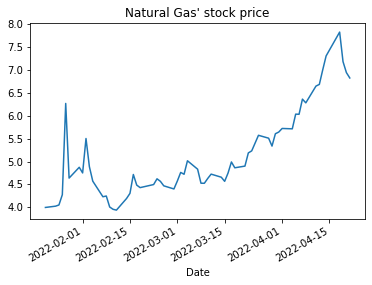

In [27]:
ticker = yf.Ticker('NG=F')
gas_df = ticker.history(period="3mo")
gas_df['Close'].plot(title="Natural Gas' stock price")

## We create a subset that includes only the closing stocks price

In [28]:
naturalgas_df=gas_df[["Close"]]
naturalgas_df=naturalgas_df.reset_index(level=0)
naturalgas_df.rename(columns = {'Close':'Stock price'}, inplace = True)
naturalgas_df.head()

,Date,Stock price
0,2022-01-21,3.999
1,2022-01-24,4.027
2,2022-01-25,4.053
3,2022-01-26,4.277
4,2022-01-27,6.265


In [29]:
naturalgas_df.tail()

,Date,Stock price
58,2022-04-14,7.300
59,2022-04-18,7.820
60,2022-04-19,7.176
61,2022-04-20,6.937
62,2022-04-21,6.820


## We create our graph using the DataWrapper library.

In [31]:
gas_chart = dw.create_chart(title = "Natural Gas' stocks", 
chart_type = 'd3-lines', data = naturalgas_df)

New chart d3-lines created!


## The outcome is:

In [32]:
dw.publish_chart(gas_chart['id'])

## We personalise it by inserting the sources and the author's name.

In [35]:
dw.update_description(
  gas_chart['id'],
  source_name = 'Yahoo Finance',
  source_url = 'https://finance.yahoo.com/quote/NG%3DF/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAMmzAm-FUjfUKdHkrPPFv5lV0BUyskMi6mn7hbK3zUOyfm61si1B_9nnqbLq1AKkTRGWSwIzzqr8WBsqjpt9-T2nUV3dPr1S8H9aLGmwH-fq4SAG1miRGA6zoat0nG1HgBKOTQQomPYQqeE4Ky5Lis0VJwQ5Cnnk_otxJq-tydRt',
  byline = 'Jacopo Cirica',
    intro= 'Since the Russian invasion of Ukraine, the price of gas has risen by more than 60%.',
)

Chart updated!


In [36]:
dw.publish_chart(gas_chart['id'])

## Let's change the title

In [40]:
dw.update_chart(
    gas_chart['id'],
    title='Natural gas stocks skyrocket',
)

Chart with id OOJrC updated!


## We complete the last details and notes in the DataWrapper dashboard.